In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf #type:ignore
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer #type:ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences #type:ignore
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.preprocessing import LabelEncoder #type:ignore
from tensorflow.keras.utils import to_categorical #type:ignore

# Load dataset
df = pd.read_csv("sentiment_analysis_1.csv")

# Clean text
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower()).strip()

df["cleaned_text"] = df["text"].apply(clean_text)

# Tokenization & Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_text"])
X = pad_sequences(tokenizer.texts_to_sequences(df["cleaned_text"]), maxlen=200)

# Encode Labels
df["encoded_label"] = LabelEncoder().fit_transform(df["label"])
y = to_categorical(df["encoded_label"], num_classes=3)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build & Train Model
model = Sequential([
    Embedding(10000, 128, input_length=200),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_test, y_test))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

# Encode Labels (store the fitted label_encoder instance)
label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["label"])
y = to_categorical(df["encoded_label"], num_classes=3)

# Sentiment Prediction (use the already fitted label_encoder)
def predict_sentiment(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([clean_text(text)]), maxlen=200)
    prediction = model.predict(seq)[0]
    return label_encoder.inverse_transform([np.argmax(prediction)])[0]  # Use the fitted label_encoder

print(predict_sentiment("The product was amazing! I loved it."))
print(predict_sentiment("It was okay, nothing special."))
print(predict_sentiment("Worst Movie I have ever watched."))

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import re 

from tensorflow.keras.preprocessing.text import Tokenizer #type:ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences #type:ignore
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Embedding , SimpleRNN , Dense #type:ignore
from tensorflow.keras.utils import to_categorical #type:ignore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv("sentiment_analysis_1.csv")


In [17]:
# Clean the text 
def clean_text(text) : 
    return re.sub(r'[^a-zA-Z\s]','',text.lower()).strip()

df["cleaned_text"] = df["text"].apply(clean_text)

In [18]:
# Tokenization and Padding 
tokenizer = Tokenizer(num_words=10000 , oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_text"])

X = pad_sequences(tokenizer.texts_to_sequences(df['cleaned_text']) , maxlen=200)

In [19]:
# Encode the labels 
le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df['label'])

# one hot encode
y = to_categorical(df["encoded_label"] , num_classes=3)

In [20]:
#split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [21]:
#Build the model 
model = Sequential([
    Embedding(10000 , 128 , input_length=200),
    SimpleRNN(64),
    Dense(64 , activation='relu'),
    Dense(3 , activation='relu')
])

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
# compile the model 
model.compile(optimizer='adam' , 
              loss='categorical_crossentropy' , 
              metrics=['accuracy'])


In [23]:
# test the model 
history = model.fit(X_train , y_train , 
                    epochs=5 ,
                    batch_size=10 , 
                    validation_data=(X_test , y_test))

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.3400 - loss: 2.6504 - val_accuracy: 0.2500 - val_loss: 1.1113
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6369 - loss: 1.0169 - val_accuracy: 0.3000 - val_loss: 1.1236
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4551 - loss: 0.9581 - val_accuracy: 0.3000 - val_loss: 1.1679
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6428 - loss: 1.0664 - val_accuracy: 0.3500 - val_loss: 1.2921
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9723 - loss: 0.5310 - val_accuracy: 0.2500 - val_loss: 1.1680


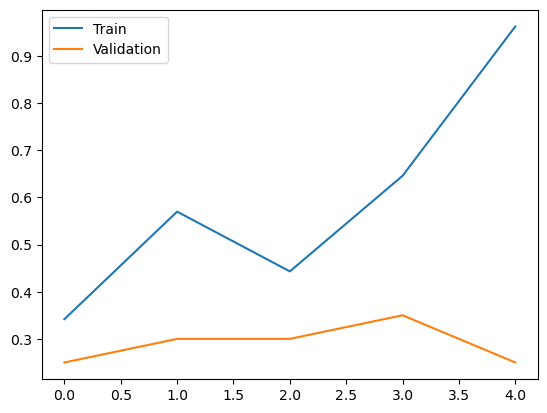

In [24]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


In [30]:
# Sentiment Prediction (use the already fitted label_encoder)
def predict_sentiment(text) : 
    seq = pad_sequences(tokenizer.texts_to_sequences([clean_text(text)]) , maxlen=200)
    prediction = model.predict(seq)[0]
    return le.inverse_transform([np.argmax(prediction)])[0]

print(predict_sentiment("The product was amazing! I loved it."))
print(predict_sentiment("It was okay, nothing special."))
print(predict_sentiment("Worst Movie I have ever watched."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
neutral
